## Experimenting with learning rate
In this exercise, your goal is to find the optimal learning rate such that the optimizer can find the minimum of the non-convex function 
 in ten steps.

You will experiment with three different learning rate values. For this problem, try learning rate values between 0.001 to 0.1.

You are provided with the optimize_and_plot() function that takes the learning rate for the first argument. This function will run 10 steps of the SGD optimizer and display the results.

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def optimize_and_plot(lr, num_epochs=100, input_size=1, output_size=1, x_train=None, y_train=None):
    # Initialize model, criterion, and optimizer
    model = nn.Linear(input_size, output_size)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.0)

    # Convert data to PyTorch tensors if provided
    if x_train is not None and y_train is not None:
        x_train = torch.Tensor(x_train)
        y_train = torch.Tensor(y_train)

    losses = []

    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(x_train)
        loss = criterion(outputs, y_train)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Save the loss for plotting
        losses.append(loss.item())

        # Print the loss every 10 epochs and add a red marker
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
            plt.scatter(epoch + 1, loss.item(), color='red', marker='o')

    # Plot the loss over epochs
    plt.plot(range(1, num_epochs+1), losses, label='Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.show()

# Example usage:
# lr = 0.01
# x_train, y_train, input_size, output_size are provided based on your specific use case
# optimize_and_plot(lr, num_epochs=100, input_size=input_size, output_size=output_size, x_train=x_train, y_train=y_train)


1. Try a small learning rate value such that the optimizer isn't able to get past the first minimum on the right.

Epoch [10/100], Loss: 0.2860
Epoch [20/100], Loss: 0.1348
Epoch [30/100], Loss: 0.0734
Epoch [40/100], Loss: 0.0400
Epoch [50/100], Loss: 0.0218
Epoch [60/100], Loss: 0.0118
Epoch [70/100], Loss: 0.0064
Epoch [80/100], Loss: 0.0035
Epoch [90/100], Loss: 0.0019
Epoch [100/100], Loss: 0.0010


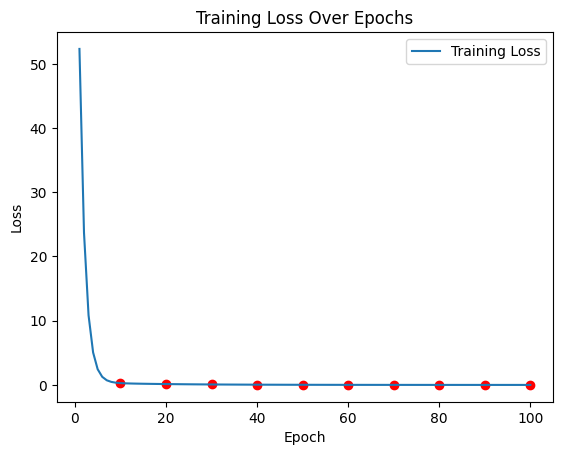

In [30]:
x_train = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
y_train = torch.tensor([[2.0], [4.0], [6.0], [8.0]])

# Try a first learning rate value
lr0 = 0.1
optimize_and_plot(lr=lr0, x_train=x_train, y_train=y_train)

For a quadratic training set,

we will have two local minima. So, we have defined a quadratic training set below.

Epoch [10/100], Loss: 46.8845
Epoch [20/100], Loss: 48.7015
Epoch [30/100], Loss: 42.6901
Epoch [40/100], Loss: 41.9073
Epoch [50/100], Loss: 41.5525
Epoch [60/100], Loss: 41.3264
Epoch [70/100], Loss: 41.3260
Epoch [80/100], Loss: 41.2853
Epoch [90/100], Loss: 41.2891
Epoch [100/100], Loss: 41.2831


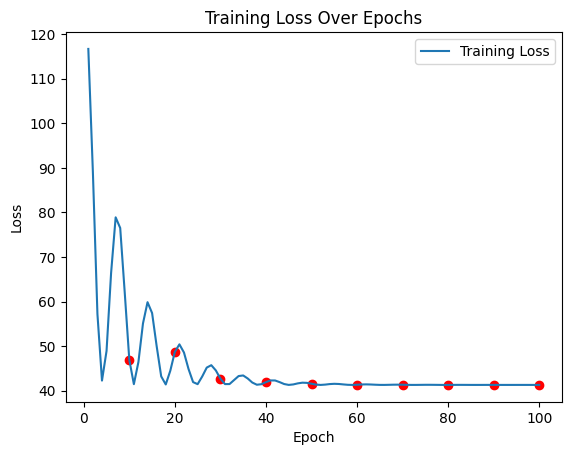

Epoch [10/100], Loss: 503.0110
Epoch [20/100], Loss: 517.3562
Epoch [30/100], Loss: 500.6244
Epoch [40/100], Loss: 498.1158
Epoch [50/100], Loss: 498.0015
Epoch [60/100], Loss: 497.1997
Epoch [70/100], Loss: 497.2212
Epoch [80/100], Loss: 497.1586
Epoch [90/100], Loss: 497.1423
Epoch [100/100], Loss: 497.1390


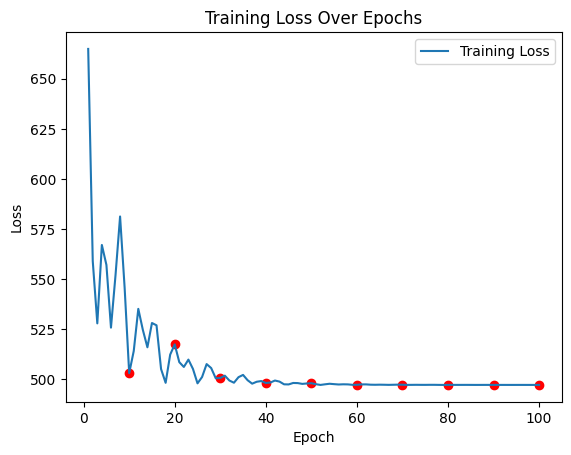

Epoch [10/100], Loss: 1380.1212
Epoch [20/100], Loss: 1418.4067
Epoch [30/100], Loss: 1321.4978
Epoch [40/100], Loss: 1308.5588
Epoch [50/100], Loss: 1303.6857
Epoch [60/100], Loss: 1299.8732
Epoch [70/100], Loss: 1299.8879
Epoch [80/100], Loss: 1299.2820
Epoch [90/100], Loss: 1299.3170
Epoch [100/100], Loss: 1299.2333


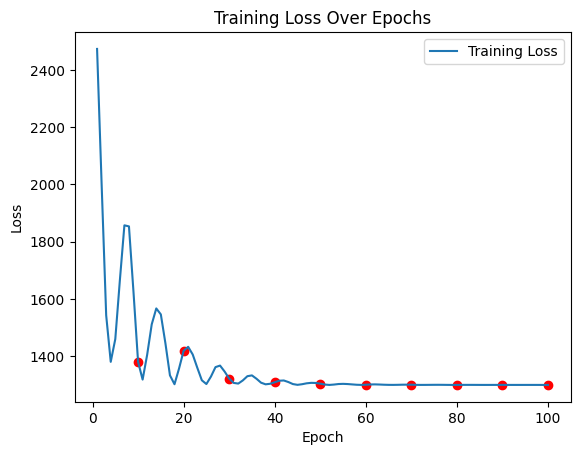

In [28]:
import torch
import numpy as np

# Function with two local minima
def quadratic_function(x):
    return x**4 - 8*x**2 + 16

def cubic_function(x):
    return x**3 - 8*x**2 + 16

def polynomial_function(x):
    return x**4 - x**3 + 5*x**2 

# Generate a dataset with two local minima
np.random.seed(42)
x_train = np.linspace(-3, 3, 100)
y_train0 = quadratic_function(x_train)
y_train1 = cubic_function(x_train) 
y_train2 = polynomial_function(x_train)

# Convert to PyTorch tensors
x_train = torch.Tensor(x_train).view(-1, 1)
y_train0 = torch.Tensor(y_train0).view(-1, 1)
y_train1 = torch.Tensor(y_train1).view(-1, 1)
y_train2 = torch.Tensor(y_train2).view(-1, 1)
# Example usage of optimize_and_plot function
lr = 0.1
optimize_and_plot(lr=lr, num_epochs=100, input_size=1, output_size=1, x_train=x_train, y_train=y_train0)
optimize_and_plot(lr=lr, num_epochs=100, input_size=1, output_size=1, x_train=x_train, y_train=y_train1)
optimize_and_plot(lr=lr, num_epochs=100, input_size=1, output_size=1, x_train=x_train, y_train=y_train2)


2. Try a large learning rate value such that the optimizer skips past the global minimum at -2.

Epoch [10/100], Loss: 616397592935034477608960.0000
Epoch [20/100], Loss: inf
Epoch [30/100], Loss: inf
Epoch [40/100], Loss: nan
Epoch [50/100], Loss: nan
Epoch [60/100], Loss: nan
Epoch [70/100], Loss: nan
Epoch [80/100], Loss: nan
Epoch [90/100], Loss: nan
Epoch [100/100], Loss: nan


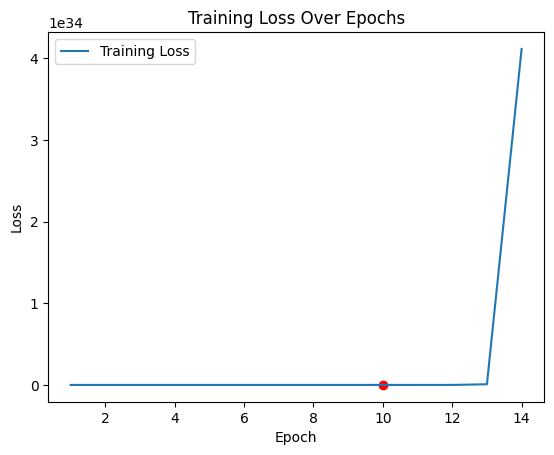

In [20]:
lr1 = 4
optimize_and_plot(lr=lr1, x_train=x_train,y_train=y_train)

3. Based on the previous results, try a better learning rate value.

Epoch [10/100], Loss: 52.6972
Epoch [20/100], Loss: 46.1435
Epoch [30/100], Loss: 44.7973
Epoch [40/100], Loss: 42.1908
Epoch [50/100], Loss: 42.5060
Epoch [60/100], Loss: 42.0889
Epoch [70/100], Loss: 42.1277
Epoch [80/100], Loss: 42.0901
Epoch [90/100], Loss: 42.0872
Epoch [100/100], Loss: 42.0858


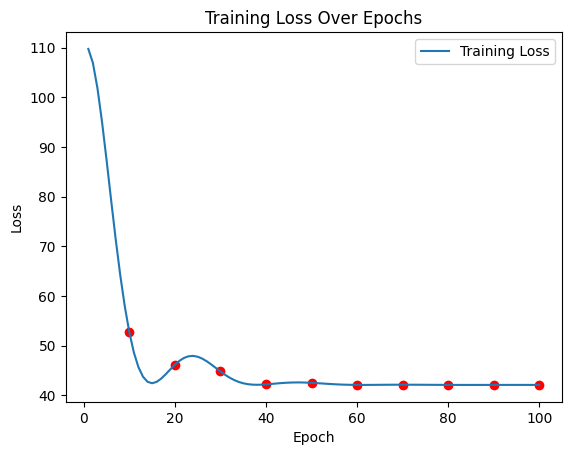

In [21]:
lr2 = 0.01
optimize_and_plot(lr=lr2, x_train=x_train, y_train=y_train)

The optimization and plot curve is the same as the gradient descent curve. They are synonymous and used interchangeably